In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../Desktop/input"))

# Any results you write to the current directory are saved as output.

[]


In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
os.listdir('./')

['.ipynb_checkpoints',
 'anger.jpg',
 'Anything',
 'Atom.lnk',
 'CAT',
 'Certificates',
 'cnn.py',
 'Counter Strike 1.6.lnk',
 'Dataset',
 'datasets.docx',
 'desktop.ini',
 'Face.ipynb',
 'face.py',
 'FaceRec',
 'fer2013.csv',
 'Final Research Paper .doc',
 'hap.jpg',
 'happ.png',
 'happy.jpg',
 'input',
 'kernel.ipynb',
 'Message.bat',
 'Mini Project',
 'New folder',
 'new.docx',
 'notes.txt',
 'NSR.pdf',
 'passport.pdf',
 'Placements',
 'Pretrained',
 'pretrained.ipynb',
 'Project',
 'Python',
 'Related Work.docx',
 'Removed Apps.html',
 'Research Paper.doc',
 'results.docx',
 'RGIT.PNG',
 'Rohit_Harman.pdf',
 'sc.png',
 'Screenshot (42).png',
 'Tencent Gaming Buddy.lnk',
 'Untitled.ipynb',
 'webcam.py',
 'Work order preparation for various manufacturing methods.pptx',
 'WORKSHOP',
 '~$final.docx',
 '~$hit_Acrotrend_CV.doc',
 '~$hit_CV.docx',
 '~$knoledgement.docx',
 '~$nopsis.docx',
 '~$roject.docx',
 '~WRL0001.tmp',
 '~WRL3139.tmp',
 'µTorrent.lnk']

In [8]:
x = pd.read_csv('../Desktop/input/fer2013.csv')
print (x.values.shape)

(35887, 3)


In [9]:
x.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [10]:
data = x.values
print (data.shape)
print (data[0, 0])

(35887, 3)
0


In [11]:
y = data[:, 0]
pixels = data[:, 1]
print (type(pixels))
print (len(pixels[0]))
print (pixels[10][10])

<class 'numpy.ndarray'>
8287
3


In [12]:
X = np.zeros((pixels.shape[0], 48*48))

for ix in range(X.shape[0]):
    p = pixels[ix].split(' ')
    for iy in range(X.shape[1]):
        X[ix, iy] = int(p[iy])

In [13]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os
from keras.layers import Dense, Convolution2D, UpSampling2D, MaxPooling2D, ZeroPadding2D, Flatten, Dropout, Reshape
from keras.models import Sequential
from keras.utils import np_utils

Using TensorFlow backend.


In [14]:
X

array([[ 70.,  80.,  82., ..., 106., 109.,  82.],
       [151., 150., 147., ..., 193., 183., 184.],
       [231., 212., 156., ...,  88., 110., 152.],
       ...,
       [ 17.,  17.,  16., ..., 154., 133., 113.],
       [ 30.,  28.,  28., ...,  35.,  30.,  28.],
       [ 19.,  13.,  14., ..., 189., 199., 201.]])

In [15]:
y

array([0, 0, 2, ..., 0, 3, 2], dtype=object)

In [16]:
x = X

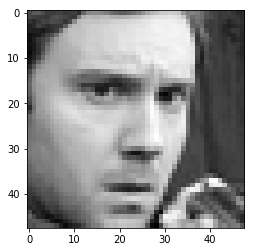

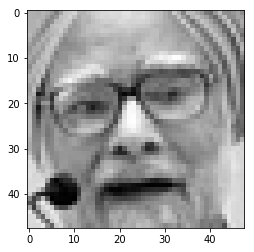

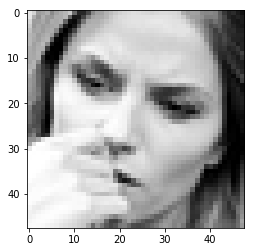

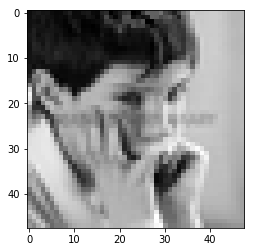

In [17]:
for ix in range(4):
    plt.figure(ix)
    plt.imshow(x[ix].reshape((48, 48)), interpolation='none', cmap='gray')
plt.show()

In [18]:
x = x / 255

In [19]:
x

array([[0.2745098 , 0.31372549, 0.32156863, ..., 0.41568627, 0.42745098,
        0.32156863],
       [0.59215686, 0.58823529, 0.57647059, ..., 0.75686275, 0.71764706,
        0.72156863],
       [0.90588235, 0.83137255, 0.61176471, ..., 0.34509804, 0.43137255,
        0.59607843],
       ...,
       [0.06666667, 0.06666667, 0.0627451 , ..., 0.60392157, 0.52156863,
        0.44313725],
       [0.11764706, 0.10980392, 0.10980392, ..., 0.1372549 , 0.11764706,
        0.10980392],
       [0.0745098 , 0.05098039, 0.05490196, ..., 0.74117647, 0.78039216,
        0.78823529]])

In [20]:
X_train = x[0:28710, :]
Y_train = y[0:28710]
print (X_train.shape, Y_train.shape)
X_crossval = x[28710:32300, :]
Y_crossval = y[28710:32300]
print (X_crossval.shape, Y_crossval.shape)

(28710, 2304) (28710,)
(3590, 2304) (3590,)


In [21]:
X_train = X_train.reshape((X_train.shape[0], 1 , 48, 48 ))
X_crossval = X_crossval.reshape((X_crossval.shape[0], 1 ,48, 48))

In [22]:
X_train.shape

(28710, 1, 48, 48)

In [23]:
print (y.shape)
y_ = np_utils.to_categorical(y, 7)
print (y_.shape)

(35887,)
(35887, 7)


In [24]:
Y_train = y_[:28710]
Y_crossval = y_[28710:32300]
print (X_crossval.shape, Y_crossval.shape)

(3590, 1, 48, 48) (3590, 7)


In [25]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.0,  
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False, 
        vertical_flip=False)  

datagen.fit(X_train)

C:\Users\ROHIT\AppData\Roaming\Python\Python36\site-packages\keras_preprocessing\image\image_data_generator.py:923: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (28710, 1, 48, 48) (48 channels).
  ' channels).')


In [26]:
from keras.callbacks import ReduceLROnPlateau
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=1)

c:\program files\python36\lib\site-packages\keras\callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [27]:
from keras.layers import Dense , Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD , Adam
from keras.layers import Conv2D , BatchNormalization
from keras.layers import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

In [28]:
def swish_activation(x):
    return (K.sigmoid(x) * x)

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(1,48,48)))
model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(96, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(96, (3, 3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(128, (3, 3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation=swish_activation))
model.add(Dropout(0.4))
model.add(Dense(7 , activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam' ,
              metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 48, 48)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 48, 48)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 24, 24)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 24, 24)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 24, 24)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 12, 12)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 96, 12, 12)        55392     
__________

In [29]:
batch_size = 128
epochs = 14

model.compile(loss='binary_crossentropy', optimizer='adam' , metrics=['accuracy'])
steps_per_epoch = len(X) // batch_size
validation_steps = len((X_crossval, Y_crossval)) // batch_size

In [30]:
history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size),
                    steps_per_epoch=X.shape[0] // batch_size,
                    callbacks=[lr_reduce],
                    validation_data=(X_crossval, Y_crossval),
                    epochs = epochs, verbose = 2)

C:\Users\ROHIT\AppData\Roaming\Python\Python36\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (28710, 1, 48, 48) (48 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


Epoch 1/14
 - 1180s - loss: 0.4049 - acc: 0.8550 - val_loss: 0.3870 - val_acc: 0.8571
Epoch 2/14
 - 1171s - loss: 0.3855 - acc: 0.8574 - val_loss: 0.3658 - val_acc: 0.8594
Epoch 3/14
 - 1280s - loss: 0.3473 - acc: 0.8682 - val_loss: 0.3097 - val_acc: 0.8784
Epoch 4/14
 - 2260s - loss: 0.3086 - acc: 0.8796 - val_loss: 0.2802 - val_acc: 0.8880
Epoch 5/14
 - 2266s - loss: 0.2871 - acc: 0.8855 - val_loss: 0.2688 - val_acc: 0.8910
Epoch 6/14
 - 2295s - loss: 0.2714 - acc: 0.8911 - val_loss: 0.2616 - val_acc: 0.8922
Epoch 7/14
 - 2294s - loss: 0.2588 - acc: 0.8956 - val_loss: 0.2571 - val_acc: 0.8960
Epoch 8/14
 - 2249s - loss: 0.2454 - acc: 0.9002 - val_loss: 0.2558 - val_acc: 0.8958

Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 9/14
 - 2218s - loss: 0.2242 - acc: 0.9093 - val_loss: 0.2499 - val_acc: 0.9003
Epoch 10/14
 - 2225s - loss: 0.2166 - acc: 0.9117 - val_loss: 0.2512 - val_acc: 0.8996

Epoch 00010: ReduceLROnPlateau reducing learning rate to

In [33]:
weights = model.get_weights()

In [34]:
np.save('my_model_weights', weights)

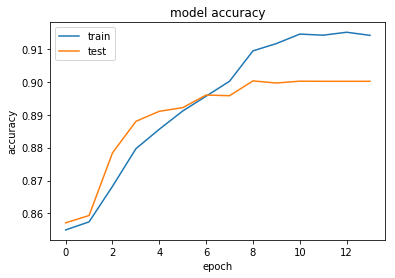

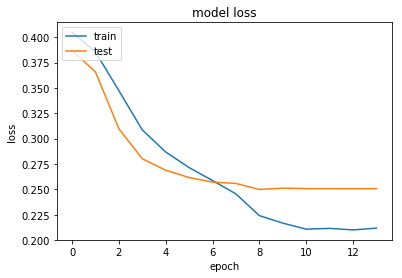

In [35]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
print (y_.shape)

(35887, 7)


In [37]:
Y_test = y_[32300:]
print (Y_test.shape)

(3587, 7)


In [38]:
X_test = x[32300:, :]
print(X_test.shape)


(3587, 2304)


In [39]:
X_test = X_test.reshape((X_test.shape[0], 1 , 48, 48 ))

In [40]:
print(X_test.shape)

(3587, 1, 48, 48)


In [41]:
score = model.evaluate(X_test, Y_test)
print('Test loss:', score[0])
print('Test accuracy:', 100*score[1])


3587/3587 [==============================] - 59s 17ms/step
Test loss: 0.24550578795770167
Test accuracy: 89.97172587490162


In [42]:
from IPython.display import Image
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [43]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

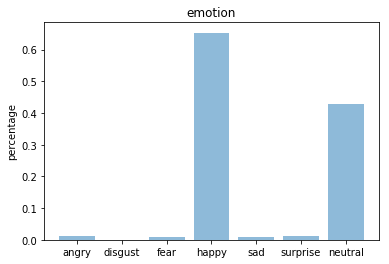

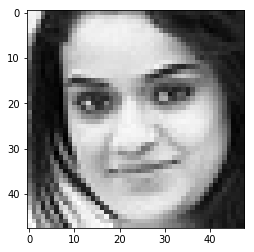

In [50]:
img = image.load_img("../Desktop/input/hap.jpg", grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(x)
plt.show()

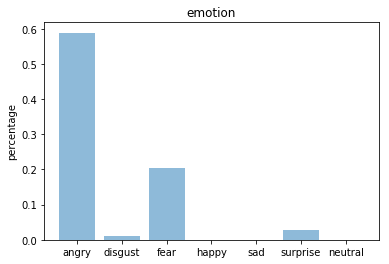

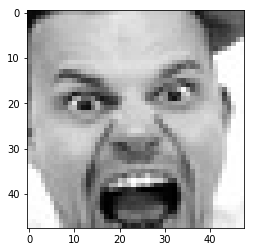

In [51]:
img = image.load_img("../Desktop/input/anger.jpg", grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(x)
plt.show()

In [52]:
from keras.models import model_from_json

In [53]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [54]:
pip install h5py


The following command must be run outside of the IPython shell:

    $ pip install h5py

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [55]:
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [56]:
from keras.models import model_from_yaml

In [57]:
# serialize model to YAML
model_yaml = model.to_yaml()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)